# Project

## Phase 1

In [1]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install nltk
!pip install langdetect

In [2]:
import pandas as pd
import numpy as np

import seaborn

## Preprocess Data

The Genius Lyrics dataset from "https://github.com/danielhorizon/lyrics-genreation" has already been preprocessed, so we just need to apply the same clean up to the "https://www.kaggle.com/datasets/mateibejan/multilingual-lyrics-for-genre-classification" dataset. This involves removing missing/small (less than 10 words) lyrics, non-english lyrics, missing genres, lowercasing all the words, and removing stop characters.

Below is a count plot of the distribution of different genres represented in the Genius Lyrics dataset.

Num of rows:  53837
Num of rows:  11894


,Unnamed: 0,artist,genre,title,lyrics,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,language,t-lyric
0,0,Iron Maiden,metal,The Number of the Beast,woe to you o'er earth and sea\r\nfor the devil...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,"['the', 'number', 'of', 'the', 'beast', '@@@',..."
1,1,Iron Maiden,metal,Fear of the Dark,i am a man who walks alone\r\nand when i'm wal...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,"['fear', 'of', 'the', 'dark', '@@@', 'i', 'am'..."
2,2,Iron Maiden,metal,The Trooper,you'll take my life but i'll take yours too\r\...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,"['the', 'trooper', '@@@', ""you'll"", 'take', 'm..."
3,3,Iron Maiden,metal,Hallowed Be Thy Name,i'm waiting in my cold cell when the bell begi...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,"['hallowed', 'be', 'thy', 'name', '@@@', ""i'm""..."
4,4,Iron Maiden,metal,Run to the Hills,white man came across the sea\r\nhe brought us...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,"['run', 'to', 'the', 'hills', '@@@', 'white', ..."


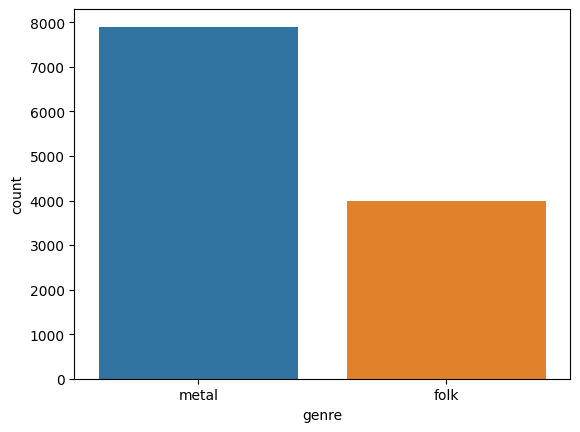

In [3]:
data = pd.read_csv("../data/master-process-data.csv", low_memory=False)
print("Num of rows: ", len(data))
data = data[(data.genre=="metal") | (data.genre=="folk")]
print("Num of rows: ", len(data))
seaborn.countplot(data, x='genre')
data.head()

### Cleaning the Multi-Lingual Lyrics for Genre Classification Dataset

Combine the training and testing data:

In [6]:
data2_train = pd.read_csv("../data/train.csv")
data2_test = pd.read_csv("../data/test.csv")

data2_train = data2_train[(data2_train.Genre=="Metal") | (data2_train.Genre=="Folk")]
data2_test = data2_test[(data2_test.Genre=="Metal") | (data2_test.Genre=="Folk")]
data2 = pd.concat([data2_train, data2_test])

data2.head()

,Artist,Song,Genre,Language,Lyrics,Song year,Track_id
100,3 doors down,here without you,Metal,en,"A hundred days have made me older,\nSince the ...",NaN,NaN
101,3 doors down,when i'm gone,Metal,en,There's another world inside of me that you ma...,NaN,NaN
102,3 doors down,kryptonite,Metal,en,I took a walk around the world\nTo ease my tro...,NaN,NaN
103,3 doors down,let me go,Metal,en,One more kiss could be the best thing\none mor...,NaN,NaN
104,3 doors down,be like that,Metal,en,"He spends his nights in California,\nWatching ...",NaN,NaN


Num of rows:  30240


<AxesSubplot: xlabel='Genre', ylabel='count'>

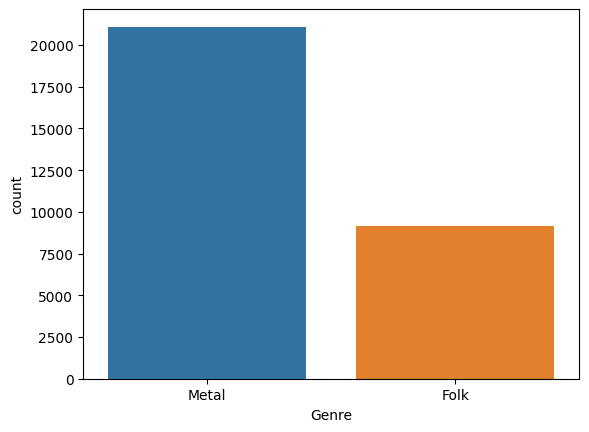

In [7]:
print("Num of rows: ", len(data2))
seaborn.countplot(data2, x='Genre')

In [8]:
def clean_data(data):
    subset = data[['Genre','Lyrics']]
    data.dropna(subset=['Genre', 'Lyrics'], inplace=True)

    # replace new lines with spaces
    data['Lyrics'] = data['Lyrics'].str.replace('\n', ' ')

    # remove entries with < 2 words

    data['word_num'] = data['Lyrics'].str.split().str.len()
    
    #remove entries where only 1 word in song
    data['word_num'].astype('int32')
    data = data[data.word_num > 1]

    # rename song with empty name to Nan
    data['Song'].replace(to_replace=np.nan, value='Nan', inplace=True)

    # remove non-englsh
    return data

data2 = clean_data(data2)

data2.head()

C:\Users\ajiev\AppData\Local\Temp\ipykernel_18504\3092725829.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Song'].replace(to_replace=np.nan, value='Nan', inplace=True)


,Artist,Song,Genre,Language,Lyrics,Song year,Track_id,word_num
100,3 doors down,here without you,Metal,en,"A hundred days have made me older, Since the l...",NaN,NaN,256
101,3 doors down,when i'm gone,Metal,en,There's another world inside of me that you ma...,NaN,NaN,366
102,3 doors down,kryptonite,Metal,en,I took a walk around the world To ease my trou...,NaN,NaN,279
103,3 doors down,let me go,Metal,en,One more kiss could be the best thing one more...,NaN,NaN,302
104,3 doors down,be like that,Metal,en,"He spends his nights in California, Watching t...",NaN,NaN,326


In [9]:
from langdetect import detect

def language_detector(string):
    try:
        res = detect(string)
    except:
        res = "undetectable"
    return res

data2.loc[data2['Language'] != 'en', 'Language'] = data2['Lyrics'][data2['Language'] != 'en'].apply(language_detector)

In [10]:
data2 = data2[data2['Language'] == 'en']
data2.head()

,Artist,Song,Genre,Language,Lyrics,Song year,Track_id,word_num
100,3 doors down,here without you,Metal,en,"A hundred days have made me older, Since the l...",NaN,NaN,256
101,3 doors down,when i'm gone,Metal,en,There's another world inside of me that you ma...,NaN,NaN,366
102,3 doors down,kryptonite,Metal,en,I took a walk around the world To ease my trou...,NaN,NaN,279
103,3 doors down,let me go,Metal,en,One more kiss could be the best thing one more...,NaN,NaN,302
104,3 doors down,be like that,Metal,en,"He spends his nights in California, Watching t...",NaN,NaN,326


In [11]:
# code from https://github.com/danielhorizon/lyrics-genreation

stopChars = [',','(',')','.','-','[',']','"']
# preprocessing the corpus by converting all letters to lowercase, 
# replacing blank lines with blank string and removing special characters
def preprocessText(text):
#     text = text.replace('\n', ' ').replace('\t','')
    processedText = text.lower()
    for char in stopChars:
        processedText = processedText.replace(char,'')
    return processedText


In [12]:
# Preprocess 
data2['Lyrics'] = data2['Lyrics'].apply(preprocessText)

In [13]:
data2.to_csv('../data/multilingual-processed.csv')

### Merge the Datasets

In [14]:
data2['cleanTitle'] = data2['Song'].apply(preprocessText)
data['cleanTitle'] = data['title'].apply(preprocessText)

# see how many titles are being shared
len(set(data['cleanTitle']).intersection(set(data2['cleanTitle'])))

2992

In [15]:
data.head()

,Unnamed: 0,artist,genre,title,lyrics,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,language,t-lyric,cleanTitle
0,0,Iron Maiden,metal,The Number of the Beast,woe to you o'er earth and sea\r\nfor the devil...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,"['the', 'number', 'of', 'the', 'beast', '@@@',...",the number of the beast
1,1,Iron Maiden,metal,Fear of the Dark,i am a man who walks alone\r\nand when i'm wal...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,"['fear', 'of', 'the', 'dark', '@@@', 'i', 'am'...",fear of the dark
2,2,Iron Maiden,metal,The Trooper,you'll take my life but i'll take yours too\r\...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,"['the', 'trooper', '@@@', ""you'll"", 'take', 'm...",the trooper
3,3,Iron Maiden,metal,Hallowed Be Thy Name,i'm waiting in my cold cell when the bell begi...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,"['hallowed', 'be', 'thy', 'name', '@@@', ""i'm""...",hallowed be thy name
4,4,Iron Maiden,metal,Run to the Hills,white man came across the sea\r\nhe brought us...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en,"['run', 'to', 'the', 'hills', '@@@', 'white', ...",run to the hills


In [16]:
data2.head()

,Artist,Song,Genre,Language,Lyrics,Song year,Track_id,word_num,cleanTitle
100,3 doors down,here without you,Metal,en,a hundred days have made me older since the la...,NaN,NaN,256,here without you
101,3 doors down,when i'm gone,Metal,en,there's another world inside of me that you ma...,NaN,NaN,366,when i'm gone
102,3 doors down,kryptonite,Metal,en,i took a walk around the world to ease my trou...,NaN,NaN,279,kryptonite
103,3 doors down,let me go,Metal,en,one more kiss could be the best thing one more...,NaN,NaN,302,let me go
104,3 doors down,be like that,Metal,en,he spends his nights in california watching th...,NaN,NaN,326,be like that


<AxesSubplot: xlabel='genre', ylabel='count'>

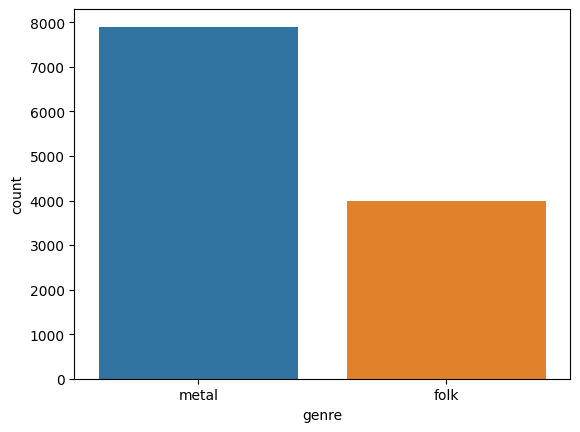

In [17]:
seaborn.countplot(data, x='genre')

<AxesSubplot: xlabel='Genre', ylabel='count'>

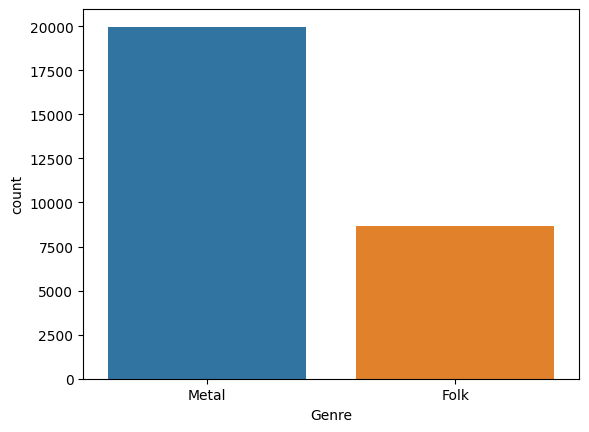

In [18]:
# pick the genres
seaborn.countplot(data2, x='Genre')


In [19]:
# unify the genres
data2['Genre'] = data2['Genre'].apply(lambda string: string.lower())
data['genre'].replace(to_replace='rb', value='r&b', inplace=True)
data['genre'].replace(to_replace='rap', value='hip-hop', inplace=True)

genres = ['rock', 'metal', 'pop', 'folk', 'r&b', 'jazz', 'hip-hop']
unified_data = data[data['genre'].isin(genres)]
unified_data2 = data2[data2['Genre'].isin(genres)]

In [20]:
# unify columns
unified_data2 = unified_data2.rename(columns={'Genre': 'genre', 'Lyrics': 'lyrics'})
unified_data2.head()

,Artist,Song,genre,Language,lyrics,Song year,Track_id,word_num,cleanTitle
100,3 doors down,here without you,metal,en,a hundred days have made me older since the la...,NaN,NaN,256,here without you
101,3 doors down,when i'm gone,metal,en,there's another world inside of me that you ma...,NaN,NaN,366,when i'm gone
102,3 doors down,kryptonite,metal,en,i took a walk around the world to ease my trou...,NaN,NaN,279,kryptonite
103,3 doors down,let me go,metal,en,one more kiss could be the best thing one more...,NaN,NaN,302,let me go
104,3 doors down,be like that,metal,en,he spends his nights in california watching th...,NaN,NaN,326,be like that


In [21]:
merged_data = pd.concat([unified_data, unified_data2])
merged_data

,Unnamed: 0,artist,genre,title,lyrics,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,...,Unnamed: 22,language,t-lyric,cleanTitle,Artist,Song,Language,Song year,Track_id,word_num
0,0.0,Iron Maiden,metal,The Number of the Beast,woe to you o'er earth and sea\r\nfor the devil...,NaN,NaN,NaN,NaN,NaN,...,NaN,en,"['the', 'number', 'of', 'the', 'beast', '@@@',...",the number of the beast,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Iron Maiden,metal,Fear of the Dark,i am a man who walks alone\r\nand when i'm wal...,NaN,NaN,NaN,NaN,NaN,...,NaN,en,"['fear', 'of', 'the', 'dark', '@@@', 'i', 'am'...",fear of the dark,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,Iron Maiden,metal,The Trooper,you'll take my life but i'll take yours too\r\...,NaN,NaN,NaN,NaN,NaN,...,NaN,en,"['the', 'trooper', '@@@', ""you'll"", 'take', 'm...",the trooper,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Iron Maiden,metal,Hallowed Be Thy Name,i'm waiting in my cold cell when the bell begi...,NaN,NaN,NaN,NaN,NaN,...,NaN,en,"['hallowed', 'be', 'thy', 'name', '@@@', ""i'm""...",hallowed be thy name,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,Iron Maiden,metal,Run to the Hills,white man came across the sea\r\nhe brought us...,NaN,NaN,NaN,NaN,NaN,...,NaN,en,"['run', 'to', 'the', 'hills', '@@@', 'white', ...",run to the hills,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7918,NaN,NaN,folk,NaN,what's the news? what's the news? o my bold sh...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,kellytheboyfromkillanne,clancy-brothers,kelly-the-boy-from-killanne,en,2006.0,4563.0,291.0
7923,NaN,NaN,metal,NaN,prepare to witness a place of gore of legal di...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,scatteredremainssplatteredbrains,cannibal-corpse,scattered-remains-splattered-brains,en,2006.0,17099.0,211.0
7925,NaN,NaN,metal,NaN,give me the sleep i need to forget my pain and...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,universe,evereve,universe,en,2006.0,4248.0,222.0
7928,NaN,NaN,metal,NaN,the pungent aroma of hot bubbling molten grist...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,carbonizedeyesockets,carcass,carbonized-eyesockets,en,2006.0,15109.0,118.0


Num of rows 40536


<AxesSubplot: xlabel='genre', ylabel='count'>

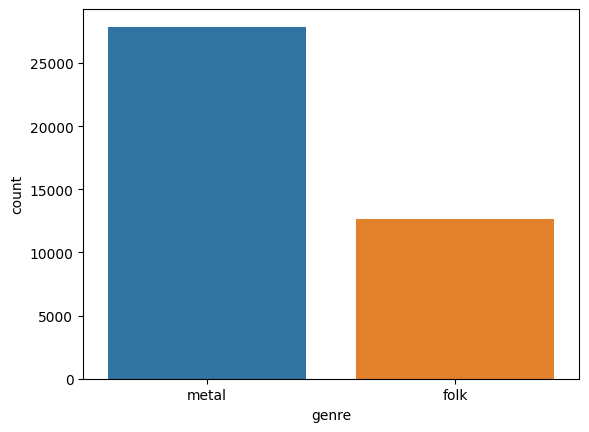

In [22]:
print('Num of rows', len(merged_data))
seaborn.countplot(merged_data, x='genre')

In [23]:
merged_data.to_csv('../data/merged_data.csv')

In [24]:
filtered = merged_data[['cleanTitle', 'genre', 'lyrics']].rename(columns={'cleanTitle': 'title'})
print(len(filtered))
filtered.to_csv('../data/data.csv')

40536
